In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.feature_selection import SelectKBest,SelectFromModel
from sklearn.decomposition import PCA,KernelPCA
from sklearn.ensemble import RandomForestClassifier

In [2]:
phleg=pd.read_csv('/home/ahmadreza/Phishing_Legitimate_full.csv')

In [3]:
phleg

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
0,1,3,1,5,72,0,0,0,0,0,...,0,0,1,1,0,1,1,-1,1,1
1,2,3,1,3,144,0,0,0,0,2,...,0,0,0,1,-1,1,1,1,1,1
2,3,3,1,2,58,0,0,0,0,0,...,0,0,0,1,0,-1,1,-1,0,1
3,4,3,1,6,79,1,0,0,0,0,...,0,0,0,1,-1,1,1,1,-1,1
4,5,3,0,4,46,0,0,0,0,0,...,1,0,0,1,1,-1,0,-1,-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,3,1,1,50,0,0,0,0,0,...,0,0,0,1,1,-1,1,0,1,0
9996,9997,2,1,4,59,1,0,0,0,0,...,1,0,0,1,0,0,1,0,1,0
9997,9998,2,1,4,57,0,0,0,0,0,...,0,0,0,1,0,1,1,0,1,0
9998,9999,3,1,1,49,0,0,0,0,0,...,1,0,0,1,1,0,1,0,1,0


In [4]:
phleg.drop('id',axis=1,inplace=True)

In [5]:
x=phleg.drop('CLASS_LABEL',axis=1)
y=phleg['CLASS_LABEL']

In [6]:
X_norm=normalize(x)

In [7]:
%%capture
skb=SelectKBest()
skb.fit(X_norm,y)

In [8]:
X_skb=skb.transform(X_norm)

In [9]:
Xtrain_skb,Xtest_skb,ytrain_skb,ytest_skb=train_test_split(X_skb,y,test_size=0.3,random_state=42)
Xtrain,Xtest,ytrain,ytest=train_test_split(X_norm,y,test_size=0.3,random_state=42)

In [10]:
model=RandomForestClassifier(n_estimators=100,max_depth=20,random_state=42)

In [11]:
model.fit(Xtrain,ytrain)

RandomForestClassifier(max_depth=20, random_state=42)

In [12]:
model.score(Xtrain,ytrain)

1.0

In [13]:
model.score(Xtest,ytest)

0.977

In [14]:
model.fit(Xtrain_skb,ytrain_skb)

RandomForestClassifier(max_depth=20, random_state=42)

In [15]:
model.score(Xtest_skb,ytest_skb)

0.9693333333333334

In [16]:
model.score(Xtrain_skb,ytrain_skb)

0.9995714285714286

In [17]:
sfm=SelectFromModel(model)

In [18]:
sfm.fit(X_norm,y)

SelectFromModel(estimator=RandomForestClassifier(max_depth=20, random_state=42))

In [19]:
X_sfm=sfm.fit_transform(X_norm,y)

In [20]:
Xtrain_sfm,Xtest_sfm,ytrain_sfm,ytest_sfm=train_test_split(X_sfm,y,test_size=0.3,random_state=42)

In [21]:
model.fit(Xtrain_sfm,ytrain_sfm)

RandomForestClassifier(max_depth=20, random_state=42)

In [22]:
model.score(Xtrain_sfm,ytrain_sfm)

1.0

In [23]:
model.score(Xtest_sfm,ytest_sfm)

0.9716666666666667

In [24]:
pca=PCA(n_components=8)

In [25]:
pca.fit(X_sfm)

PCA(n_components=8)

In [26]:
X_pca=pca.transform(X_sfm)
mean=pca.mean_
v1=pca.components_[0]

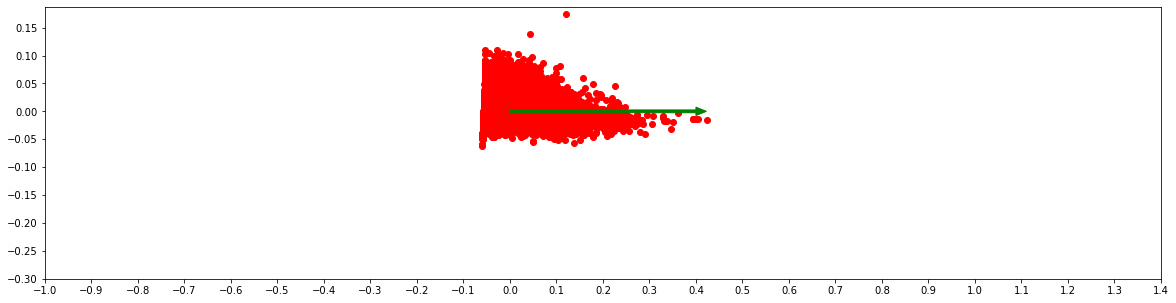

In [27]:
#selection 2D from model for plotting
plt.figure(figsize=(20,5))
plt.scatter(X_pca[:,0],X_pca[:,1],c='r')
plt.arrow(0,0,0.4,0,color='green',width=0.005)
plt.xticks(np.arange(-1,1.5,0.1))
plt.yticks(np.arange(-0.3,0.2,0.05))
plt.show()

In [28]:
Xtrain_pca,Xtest_pca,ytrain_pca,ytest_pca=train_test_split(X_pca,y,test_size=0.3,random_state=42)

In [29]:
model.fit(Xtrain_pca,ytrain_pca)

RandomForestClassifier(max_depth=20, random_state=42)

In [30]:
model.score(Xtrain_pca,ytrain_pca)

1.0

In [31]:
model.score(Xtest_pca,ytest_pca)

0.942

In [32]:
n=np.arange(1,12)
score_train,score_test=[],[]
for i in n:
    pca=PCA(n_components=i)
    X_pca=pca.fit_transform(X_sfm,y)
    Xtrain_pca,Xtest_pca,ytrain_pca,ytest_pca=train_test_split(X_pca,y,test_size=0.3,random_state=42)
    model.fit(Xtrain_pca,ytrain_pca)
    score_test.append(model.score(Xtest_pca,ytest_pca))
    score_train.append(model.score(Xtrain_pca,ytrain_pca))

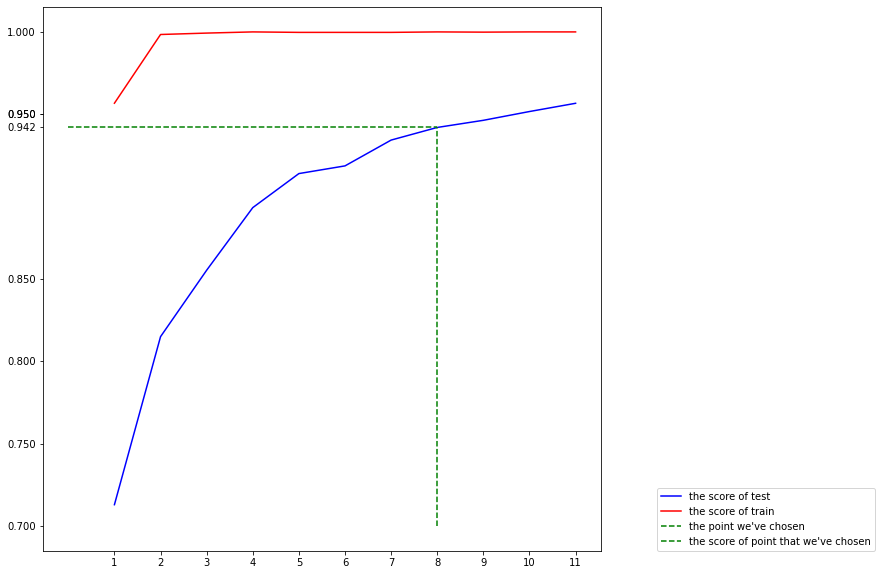

In [33]:
plt.figure(figsize=(10,10))
plt.plot(n,score_test,label='the score of test',c='b')
plt.plot(n,score_train,label='the score of train',c='r')
plt.plot([8,8],[0.7,score_test[7]],'--',label="the point we've chosen",c='green')
plt.plot([0,8],[score_test[7],score_test[7]],'--',label="the score of point that we've chosen",c='green')
plt.xticks(np.arange(1,12))
plt.yticks([0.70,0.75,0.80,0.85,0.95,score_test[7],0.95,1.00])
plt.legend(loc=(1.1,0))
plt.show()

In [34]:
n=np.arange(3,10)
score_train,score_test=[],[]
for i in n:
    kpca=KernelPCA(n_components=i,kernel='rbf')
    X_pca=kpca.fit_transform(X_sfm,y)
    Xtrain_pca,Xtest_pca,ytrain_pca,ytest_pca=train_test_split(X_pca,y,test_size=0.3,random_state=42)
    model.fit(Xtrain_pca,ytrain_pca)
    score_test.append(model.score(Xtest_pca,ytest_pca))
    score_train.append(model.score(Xtrain_pca,ytrain_pca))

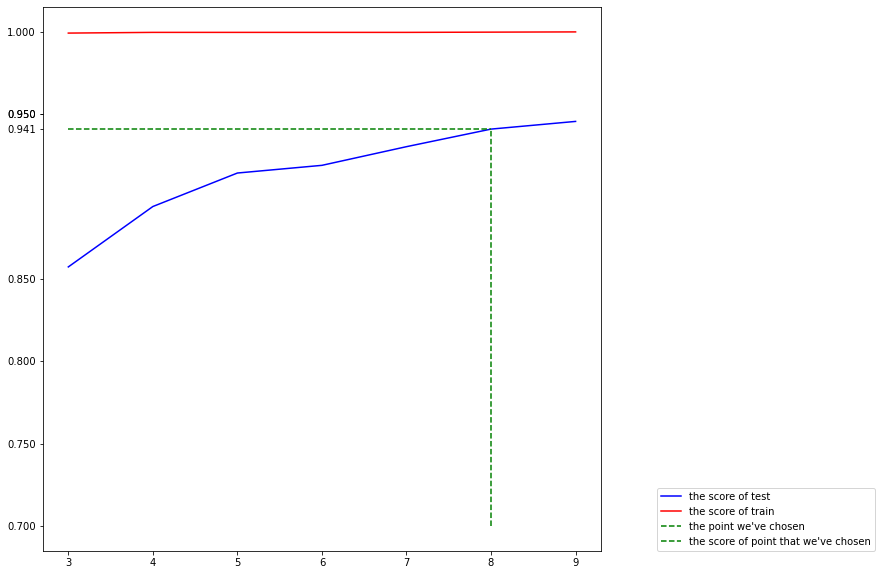

In [35]:
plt.figure(figsize=(10,10))
plt.plot(n,score_test,label='the score of test',c='b')
plt.plot(n,score_train,label='the score of train',c='r')
plt.plot([8,8],[0.7,score_test[5]],'--',label="the point we've chosen",c='green')
plt.plot([3,8],[score_test[5],score_test[5]],'--',label="the score of point that we've chosen",c='green')
plt.xticks(np.arange(3,10))
plt.yticks([0.70,0.75,0.80,0.85,0.95,score_test[5],0.95,1.00])
plt.legend(loc=(1.1,0))
plt.show()

In [36]:
df=pd.DataFrame([[X_norm.shape[1],11,8],['100%','100%','100%'],['97.70%','97.16%','94.20%']]
,columns=['original data','Feature selection','Feature extraction'],index=['Dimention','accuracy of train','accuracy of test'])

In [37]:
df

,original data,Feature selection,Feature extraction
Dimention,48,11,8
accuracy of train,100%,100%,100%
accuracy of test,97.70%,97.16%,94.20%
